In [50]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
csv_path = "USA NFL Arrest DATA.csv"
df = pd.read_csv(csv_path)

df.head(954)

,DATE,TEAM,NAME,POS,CASE,CATEGORY,DESCRIPTION,OUTCOME
0,1/17/2020,NE,Joejuan Williams,CB,Arrested,Drugs,"Pulled over for speeding in Nashville, accused...",Resolution undetermined.
1,1/16/2020,CLE,Odell Beckham,WR,Warrant,Battery,Accused of slapping the buttocks of a police o...,Warrant rescinded.
2,1/11/2020,NE,Julian Edelman,WR,Arrested,Vandalism,Accused of jumping on the hood of a Mercedes i...,Resolution undetermined.
3,12/29/2019,MIA,Xavien Howard,CB,Arrested,Domestic violence,"Police in Davie, Fla., say he pushed his fianc...",Resolution undetermined.
4,12/20/2019,PIT,Kameron Kelly,S,Arrested,Disorderly conduct,Accused of making threats and resisting arrest...,Resolution undetermined. Team released him sam...
...,...,...,...,...,...,...,...,...
949,2/16/2000,KC,Andre Rison,WR,Arrested,Theft,"Accused of renting but not returning a $1,100 ...","Pleaded no contest, sentenced to one year of p..."
950,2/6/2000,NYJ,Wayne Chrebet,WR,Arrested,Disorderly conduct,Accused of disorderly conduct in altercation o...,"Pleaded guilty to nuisance violation, fined $230."
951,2/6/2000,IND,Keith Elias,RB,Arrested,Disorderly conduct,Accused of resisting arrest and disorderly con...,"Pleaded guilty to nuisance violation, fined $230."
952,2/5/2000,CIN,Steve Foley,LB,Arrested,Domestic violence,Accused of kicking in the door of his son's mo...,Charge dropped after woman declined to cooperate.


In [51]:
new = df.CATEGORY.str.split(",", expand=True)
df['NEW'] = new[0]
reduced = df.loc[:,['POS', 'NEW']]
reduced
#counts = reduced['POS'].value_counts()
reduced
#counts_df = pd.DataFrame(counts)
#counts_df.index.names = ['pos']
#counts_df.rename(columns = {'POS':'freq'}, inplace = True) 
#counts_df




,POS,NEW
0,CB,Drugs
1,WR,Battery
2,WR,Vandalism
3,CB,Domestic violence
4,S,Disorderly conduct
...,...,...
951,RB,Disorderly conduct
952,LB,Domestic violence
953,RB,Drugs
954,LB,Murder


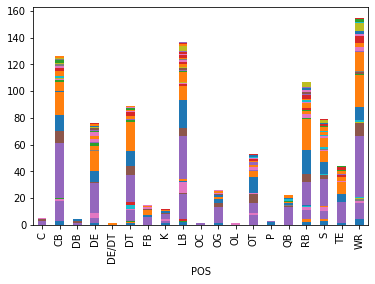

In [60]:
df2 = reduced.groupby(['POS', 'NEW'])['POS'].count().unstack('NEW').fillna(0)
#df2.columns
df2.plot(kind='bar', stacked=True, legend = False)